# Imports

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%run methods_freshfrozen.ipynb

In [ ]:
df = pd.read_csv("evidence_freshfrozen.txt",  sep="\t")

# Dataset Infos
Number of columns:          71 <br>
Number of samples:          1.396.568 <br>
Number unique Sequences:    208.096 <br>
Number of proteins:         13.351 <br>
Number of genes:            13.151 <br>
Number of fractions:        48 <br>
Number of Raw files:        144 (1 per fraction) <br>
experiment count:           3 <br>
sequence length range:      7 - 55 <br>
m/z range:                  430,271 - 1645,845 <br>
Mass range:                 854,395 - 4599,266 <br>
RT range:                   0,019755 - 30,0(30  min usual) <br>
1/K range:                  0,854538535940709 - 1,29340953803871 <br>
CCS range:                  190,575 -1034,718<br>
<br>

columns: ['Sequence', 'Length', 'Modifications', 'Modified sequence','Oxidation (M) Probabilities', 'Oxidation (M) Score Diffs',<br>
       'Acetyl (Protein N-term)', 'Oxidation (M)', 'Missed cleavages','Proteins', 'Leading proteins', 'Leading razor protein', 'Gene names',<br>
       'Protein names', 'Type', 'Raw file', 'Fraction', 'Experiment','MS/MS m/z', 'Charge', 'm/z', 'Mass','Uncalibrated - Calibrated m/z [ppm]',<br>
       'Uncalibrated - Calibrated m/z [Da]', 'Mass error [ppm]','Mass error [Da]', 'Uncalibrated mass error [ppm]',<br>
       'Uncalibrated mass error [Da]', 'Max intensity m/z 0', 'Retention time','Retention length', 'Calibrated retention time',<br>
       'Calibrated retention time start', 'Calibrated retention time finish','Retention time calibration', 'Ion mobility index',<br>
       'Ion mobility length', '1/K0', '1/K0 length', 'Calibrated 1/K0', 'CCS','Calibrated CCS', 'CCS length', 'Match time difference',<br>
       'Match m/z difference', 'Match K0 difference', 'Match q-value','Match score', 'Number of data points', 'Number of scans',<br>
       'Number of isotopic peaks', 'PIF', 'Fraction of total spectrum','Base peak fraction', 'PEP', 'MS/MS count', 'MS/MS scan number',<br>
       'Score', 'Delta score', 'Combinatorics', 'Intensity', 'Reverse','Potential contaminant', 'id', 'Protein group IDs', 'Peptide ID',<br>
       'Mod. peptide ID', 'MS/MS IDs', 'Best MS/MS', 'Oxidation (M) site IDs','Taxonomy IDs']<br>

# Data Exploration

In [ ]:
# subset dataset
df_51 = df[df["Experiment"]=='P064051']
df_64 = df[df["Experiment"]=='P064064']
df_28 = df[df["Experiment"]=='P064428']

## General

In [ ]:
# sequence length vs CCS
groups = df.groupby('Charge')
for name, group in groups:
    plt.scatter(group['Mass'], group['CCS'], label=name, alpha = 0.1)
plt.xlabel('Mass')
plt.ylabel('CCS')
plt.legend(title='Charge')
plt.show()

In [ ]:
# mass vs 1/K0
groups = df.groupby('Charge')
for name, group in groups:
    plt.scatter(group['Mass'], group['1/K0'], label=name, alpha = 0.1, cmap = 'viridis')
plt.xlabel('Mass')
plt.ylabel('1/K0')
plt.legend(title='Charge')
plt.show()

In [ ]:
groups = df.groupby('Charge')
for name, group in groups:
    plt.scatter(y = group['1/K0'], x = group['m/z'], label=name, alpha = 0.1)
plt.ylabel('1/K0')
plt.xlabel('m/z')
plt.legend(title='Charge')
plt.show()


In [ ]:
groups = df.groupby('Charge')
for name, group in groups:
    plt.scatter(y = group['1/K0'], x = group['CCS'], label=name, alpha = 0.1)
plt.ylabel('1/K0')
plt.xlabel('CCS')
plt.legend(title='Charge')
plt.show()

In [ ]:
groups = df.groupby('Charge')
for name, group in groups:
    plt.scatter(y = group['Retention time'], x = group['Mass'], label=name, alpha = 0.1)
plt.ylabel('Retention time')
plt.xlabel('Mass')
plt.legend(title='Charge')
plt.show()

In [ ]:
groups = df.groupby('Charge')
for name, group in groups:
    plt.scatter(y = group['Retention time'], x = group['1/K0'], label=name, alpha = 0.1)
plt.ylabel('Retention time')
plt.xlabel('1/K0')
plt.legend(title='Charge')
plt.show()

In [ ]:
groups = df.groupby('Charge')
for name, group in groups:
    plt.scatter(y = group['Retention time'], x = group['Charge'], label=name, alpha = 0.1)
plt.ylabel('Retention time')
plt.xlabel('Charge')
plt.legend(title='Charge')
plt.show()

In [ ]:
plt.hist(df['Retention time'], bins = 30)
plt.title('Retention time')
plt.xlabel('Retention time')
plt.show()

In [ ]:
#TODO: How many Datatpoint over all Fractions
df_51 = df[df["Experiment"]=='P064051']
plt.hist(df_51['Fraction'], alpha = 0.5, bins = 48)[2]

df_64 = df[df["Experiment"]=='P064064']
plt.hist(df_64['Fraction'], alpha = 0.5, bins = 48)[2]

df_28 = df[df["Experiment"]=='P064428']
plt.hist(df_28['Fraction'], alpha = 0.5, bins = 48)[2]

In [69]:
im_range = df['1/K0'].max()-df['1/K0'].min()

## Isomers

118.128 Isomers found <br>
38.821 Pairs found <br>
<br>

1 with Charge 1 <br>
104.080 with Charge 2 <br>
12.999 with Charge 3 <br>
1.048 with Charge 3 <br>

In [83]:
isomers_df = find_isomers(df, 'm/z', 0.0)

<Axes: xlabel='m/z', ylabel='1/K0'>

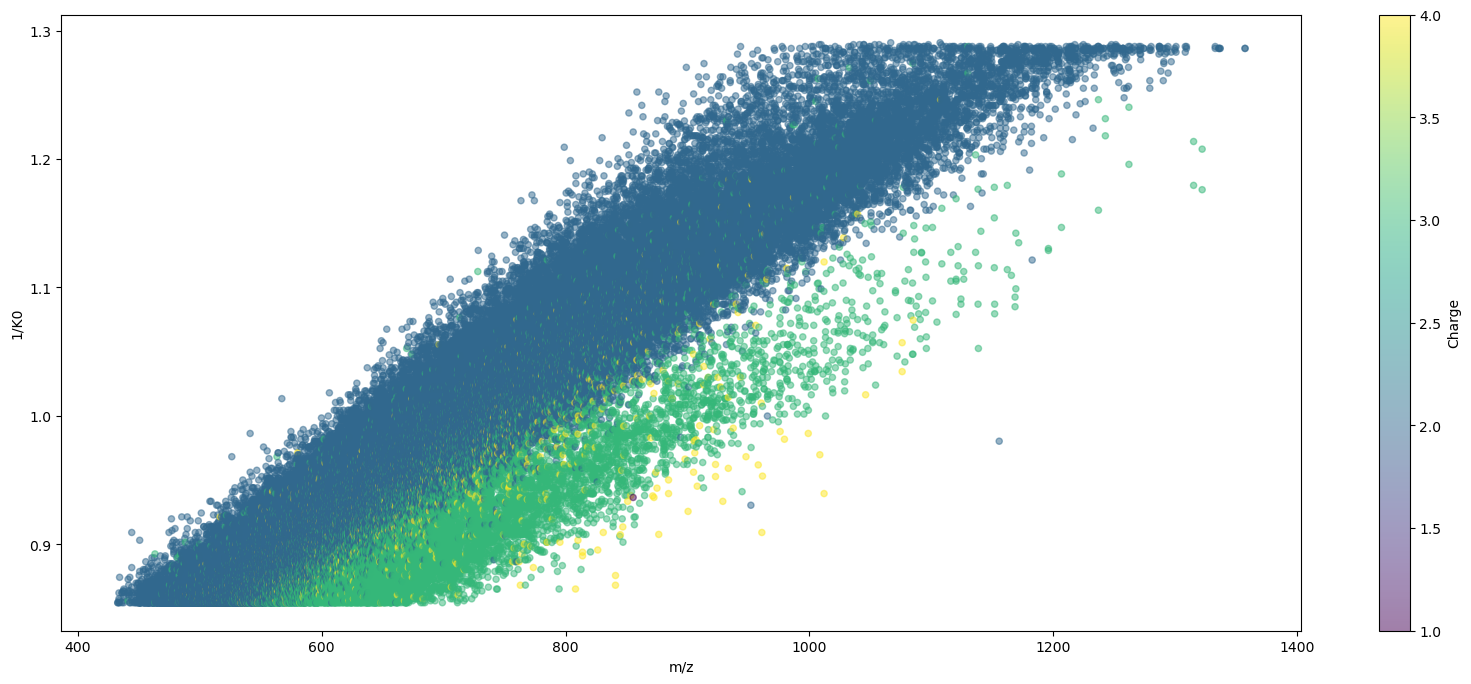

In [42]:
isomers_df.plot.scatter(x= 'm/z', y = '1/K0', c = 'Charge', figsize = (20,8), cmap = 'viridis', alpha = 0.5)

### RT Difference

1st: m/z (0.0) [38.821]<br>
2nd: RT  (1.8) [8.746]<br>
3rd: 1/K0 (0.06)[7.726]<br>

RT:<br>
4 Sets with no difference<br>
0.01: 85 Sets<br>
0.1: 743 Sets<br>

Text(0.5, 0, 'RT Difference')

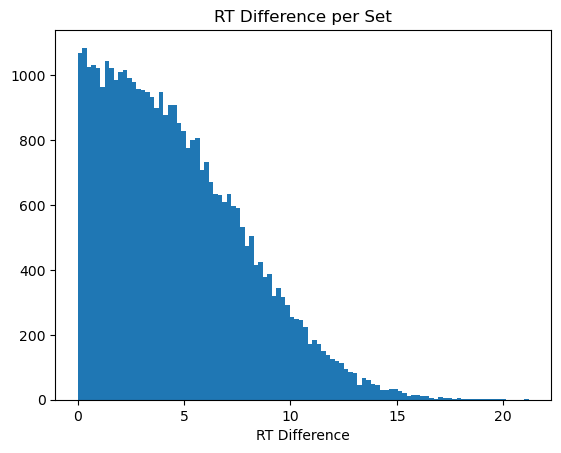

In [84]:
# Check RT for all isomers
im_diff_df = isomers_df[['Set', 'Retention time', 'Fraction','Experiment']]
grouped_diff_df = im_diff_df.groupby('Set')['Retention time'].max()- im_diff_df.groupby('Set')['Retention time'].min()
grouped_diff_df = grouped_diff_df.reset_index()
plt.hist(x= grouped_diff_df['Retention time'], bins = 100)[2]
plt.title('RT Difference per Set')
plt.xlabel('RT Difference')

In [85]:
isomers_rt = isomers_df[(isomers_df['Set'].isin(grouped_diff_df[grouped_diff_df['Retention time']<=1.80]['Set']))]

### IM Difference

In [86]:
isomers_rt_small = isomers_rt[['Sequence','Set','Fraction', 'Experiment','Charge', 'm/z', 'Retention time', '1/K0', 'Score', 'Delta score']]

<Axes: xlabel='Retention time', ylabel='1/K0'>

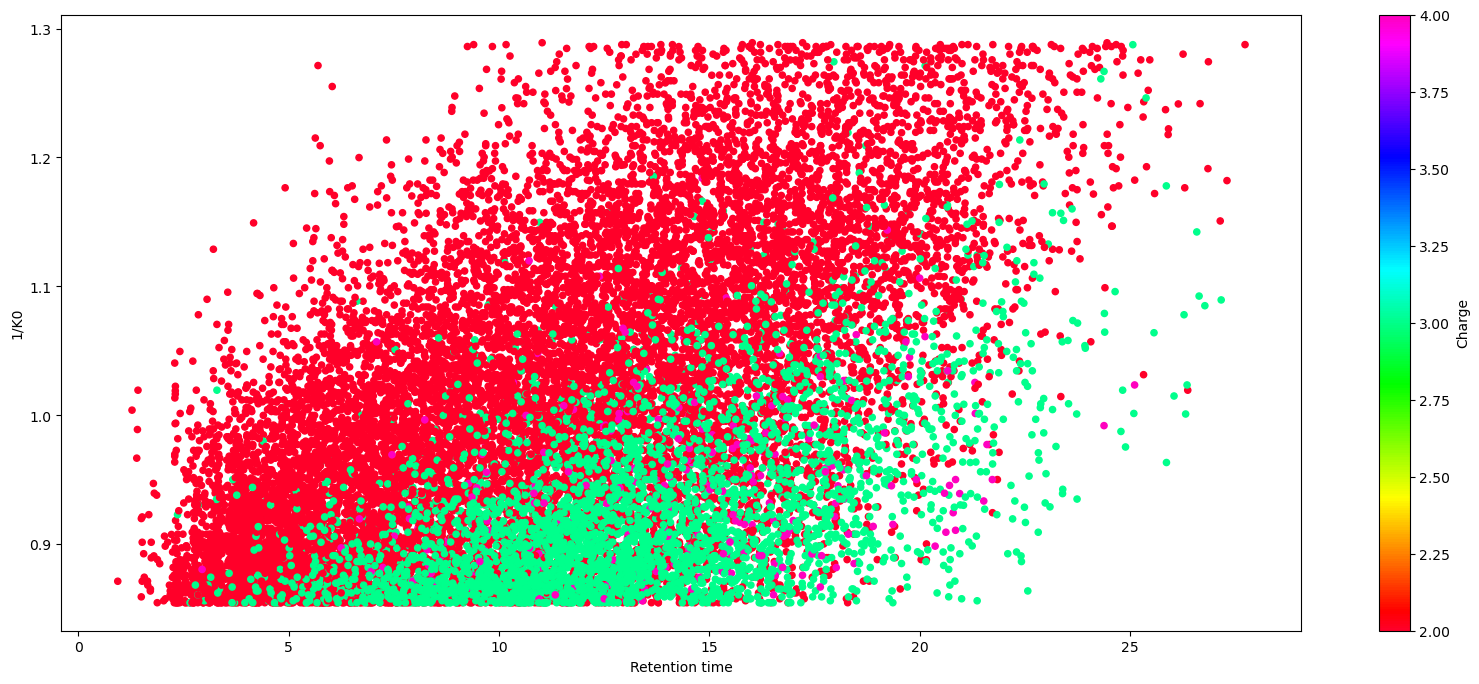

In [72]:
isomers_rt.plot.scatter(x = 'Retention time', y= '1/K0', c = 'Charge', figsize = (20,8), colormap = 'gist_rainbow')

Text(0.5, 0, 'Relative 1/K0 Difference')

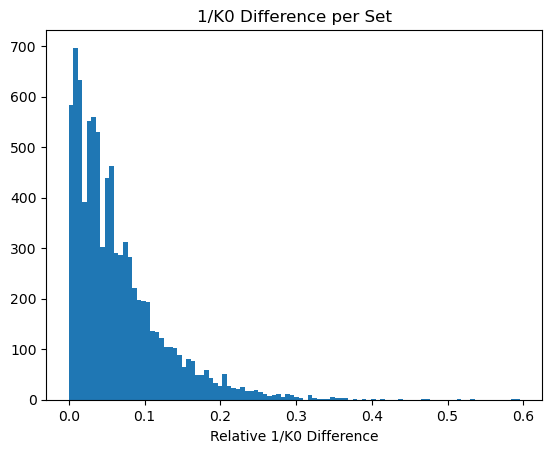

In [89]:
# Check RT for all isomers
im_diff_df = isomers_rt[['Set', '1/K0', 'Fraction','Experiment']]
grouped_diff_df = im_diff_df.groupby('Set')['1/K0'].max()- im_diff_df.groupby('Set')['1/K0'].min()
grouped_diff_df = grouped_diff_df.reset_index()
plt.hist(x=( grouped_diff_df['1/K0']/im_range), bins = 100)[2]
plt.title('1/K0 Difference per Set')
plt.xlabel('Relative 1/K0 Difference')

Threshhold 0.06 because of standard deviation of IM of unmodified sequences to the mean

In [95]:
small_im_diff = grouped_diff_df[grouped_diff_df['1/K0']<0.06]
im_diff_df = isomers_df[isomers_df['Set'].isin(small_im_diff['Set'])][['Sequence','Set', 'Fraction','Experiment', 'Modifications','Charge','m/z','Retention time', '1/K0', 'CCS', 'Score', 'Delta score']]
print(len(small_im_diff))

7726


TODO:Check CCS within isomers of the same fraction ->different CCS probably fraction/experiment error


TODO:maybe hypothesis testing for treshhold 1/K0

#### CCS Variance

In [96]:
# find sequences which are the same and are in the same fraction and experiment
rt_isomers = df.groupby(['Modified sequence', 'Fraction', 'Experiment'])
rt_isomers = rt_isomers.filter(lambda x: len(x) > 1)
rt_isomers = 

In [ ]:
pairs = same_rt_std[same_rt_std['1/K0']==0]['Set']
print(same_rt[same_rt['Set'].isin(pairs.tolist())][['Sequence','Fraction','Charge' , 'Modifications','Experiment', 'm/z', '1/K0','CCS', 'PEP','Score' ,'Delta score']])

0 undistinguishable sequences in MS1 with all 3 Dimensions(m/z, RT, 1/K0)

## Modifications

In [ ]:
df_mod = df.drop_duplicates(subset =  ['Sequence', 'Modified sequence', 'Modifications'])
df_mod = df_mod[df_mod['Modified sequence'].notna()]
df_mod.plot.scatter(x = 'Retention time', y = '1/K0', c = pd.Categorical(df_mod['Modifications']).codes, colormap = 'viridis', alpha = 0.5)
df_mod.plot.scatter(x = 'Fraction', y = '1/K0', c = pd.Categorical(df_mod['Modifications']).codes, colormap = 'viridis', alpha = 0.5)
df_mod.plot.scatter(x = 'Length', y = '1/K0', c = pd.Categorical(df_mod['Modifications']).codes, colormap = 'viridis', alpha = 0.5)
df_mod.plot.scatter(x = 'Mass', y = 'Modifications',colormap = 'viridis', alpha = 0.5)


Modifications: 'Unmodified', 'Acetyl (Protein N-term)', 'Oxidation (M)', 'Acetyl (Protein N-term),Oxidation (M)', '2 Oxidation (M)'<br> 
Modification|Number Sequences|number of only modified sequences(no matching unmodified sequence available)
unmodified: 1226330,  <br> 
Acetyl: 9659 <br> 
Oxidation: 146068,  <br> 
ac-ox: 2411<br> 
ac-2ox:156<br>
ac-3ox:8<br> 
2 ox: 11078, <br> 
3 ox: 814<br> 
4 ox: 42<br> 
5 ox:2<br> 

In [77]:


df_un = difference_mass_modification2(df, 'Unmodified', '1/K0', 1000)
df_ac = difference_mass_modification2(df, 'Acetyl (Protein N-term)', '1/K0',1000)
df_ac_ox = difference_mass_modification2(df, 'Acetyl (Protein N-term),Oxidation (M)', '1/K0', 1000)
df_ac_2ox = difference_mass_modification2(df, 'Acetyl (Protein N-term),2 Oxidation (M)', '1/K0')
df_ac_3ox = difference_mass_modification2(df, 'Acetyl (Protein N-term),3 Oxidation (M)', '1/K0')
df_ox = difference_mass_modification2(df, 'Oxidation (M)', '1/K0', 1000)
df_ox2 = difference_mass_modification2(df, '2 Oxidation (M)', '1/K0', 1000)
df_ox3 = difference_mass_modification2(df, '3 Oxidation (M)', '1/K0')
df_ox4 = difference_mass_modification2(df, '4 Oxidation (M)', '1/K0')
df_ox5 = difference_mass_modification2(df, '5 Oxidation (M)', '1/K0')

In [76]:
df_ox = difference_mass_modification2(df, 'Oxidation (M)', 'Mass', 1000)
print(df_ox[['Sequence', 'Mass_mod', 'Mass_unmod', 'Difference']])

                                      Sequence    Mass_mod  Mass_unmod  \
0                              YMADMDELFSQVDEK  1835.75937  1819.76445   
1                  ANEMNISPASLASLYEEDFKQDMAALK  3001.40489  2985.40997   
2                                  NALESYAFNMK  1302.59144  1286.59652   
3                                   MMEVAAADVK  1079.49912  1063.50420   
4                              GAMGIMLVYDITNEK  1669.80553  1653.81061   
..                                         ...         ...         ...   
984                              VHQILEGSNEVMR  1526.75113  1510.75621   
985                              DLVNFINMFADTR  1570.74498  1554.75006   
986                               NWPSDEMPDFPK  1477.61838  1461.62347   
987  HAVLMGLQPATEYIVNLVAVHGTVTSEPIVGSITTGIDPPK  4240.24535  4224.25043   
988                       ASMMYLENGTPDTAAMALER  2186.96463  2170.96971   

     Difference  
0      15.99492  
1      15.99492  
2      15.99492  
3      15.99492  
4      15.99492  
.. 

In [ ]:
df_ac = difference_mass_modification2(df, 'Acetyl (Protein N-term)', '1/K0')
plt.hist(x = (df_ac['Difference']/0.5))

In [ ]:
df_ox = difference_mass_modification2(df, 'Oxidation (M)', '1/K0')


In [ ]:

plt.hist(x = (df_ox['Difference']/0.5))

TODO: Technical error
look at only one Experiment(maybe the minus is only contributed by one experimetn/fraction)

In [78]:
%run methods_freshfrozen.ipynb
df_list = [df_un, df_ac, df_ac_ox, df_ac_2ox, df_ac_3ox, df_ox,df_ox2, df_ox3, df_ox4, df_ox5]
str_list = ['Unmodified', 'Acetyl (Protein N-term)', 'Acetyl (Protein N-term),Oxidation (M)', 'Acetyl (Protein N-term),2 Oxidation (M)', 'Acetyl (Protein N-term),3 Oxidation (M)', 'Oxidation (M)',
            '2 Oxidation (M)', '3 Oxidation (M)', '4 Oxidation (M)', '5 Oxidation (M)']
prop_list = ['Mass', 'Retention time', '1/K0']
diff = 'Difference'
for prop in prop_list:
    print(f'Difference in {prop}')
    counter = 0
    for df_diff in df_list:
        df_diff = difference_mass_modification2(df, str_list[counter], prop)
        print(f'{str_list[counter]}: {df_diff[diff].mean()}, {df_diff[diff].std()}')
        counter +=1
    print()


Difference in Mass
Unmodified: -7.844391802791506e-16, 8.126052372517802e-14
Acetyl (Protein N-term): 42.010565174349864, 4.985108911766138e-06
Acetyl (Protein N-term),Oxidation (M): 58.005479749552805, 1.564009085954774e-06
Acetyl (Protein N-term),2 Oxidation (M): 74.00039675675674, 4.745789858873758e-06
Acetyl (Protein N-term),3 Oxidation (M): 89.99531000000002, 0.0
Oxidation (M): 15.994914658761529, 4.982780506174385e-06
2 Oxidation (M): 31.98982913203726, 2.8143542303415943e-06
3 Oxidation (M): 47.98474403750001, 4.909554280818911e-06
4 Oxidation (M): 63.979660000000074, 1.9410819082438557e-13
5 Oxidation (M): 79.97457000000031, 0.0

Difference in Retention time
Unmodified: 0.008081163100775146, 0.5933124518862852
Acetyl (Protein N-term): 4.009711080115824, 2.0925428533469312
Acetyl (Protein N-term),Oxidation (M): 2.324799472452961, 2.366082190522964
Acetyl (Protein N-term),2 Oxidation (M): 0.17135079686566188, 1.0116635835092473
Acetyl (Protein N-term),3 Oxidation (M): -1.24931756

In [ ]:
plt.hist(x = df_ac['Difference'])[2]
plt.hist(x = df_ac_ox['Difference'])[2]
plt.hist(x = df_ac_2ox['Difference'])[2]
plt.hist(x = df_ac_3ox['Difference'])[2]
plt.hist(x = df_ox['Difference'])[2]
plt.hist(x = df_ox2['Difference'])[2]
plt.hist(x = df_ox3['Difference'])[2]
plt.hist(x = df_ox4['Difference'])[2]
plt.hist(x = df_ox5['Difference'])[2]







In [ ]:
print(len(df_un))
print(len(df_ac))
print(len(df_ac_ox))
print(len(df_ac_2ox))
print(len(df_ac_3ox))
print(len(df_ox))
print(len(df_ox2))
print(len(df_ox3))
print(len(df_ox4))
print(len(df_ox5))

## Matrix Effect

### Peptides in many fractions

#### Experiment 51

In [ ]:
# look at proteins
# over different fractions
df_proteins_51 = df_51.sort_values(by='Proteins', ignore_index=True)
df_proteins_51 = df_proteins_51.drop_duplicates(subset=['Sequence', 'Fraction', 'Experiment', 'Proteins'], ignore_index=True)
df_proteins_51 = df_proteins_51[['Sequence', 'Fraction', 'Experiment', 'Proteins']]

# make new table with unique sequence, in how many fractions and how many experiments
df_unique_seq_51 = df_proteins_51[['Sequence', 'Fraction', 'Experiment']]

df_unique_seq_51 = df_unique_seq_51.groupby('Sequence').agg({'Experiment': 'nunique', 'Fraction': 'nunique'}).reset_index()

# Rename the columns for clarity
df_unique_seq_51.columns = ['Sequence', 'num_experiments', 'num_fractions']


In [ ]:

df_unique_seq_51.plot.bar(x='Sequence', y='num_fractions', figsize = (20,8))
# which proteins appear in how many fractions

In [ ]:
df_top_ten_51= get_peptides_across_many_fractions(df_51, 15)

plot_scatter( df_top_ten_51,y='Fraction', x= 'Mass', c='Sequence')
plot_scatter(df_top_ten_51, y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_top_ten_51, y='Fraction', x= '1/K0', c='Sequence')

plot_scatter(df_top_ten_51, y='Fraction', x= 'Calibrated 1/K0', c='Sequence')

In [ ]:
df_top_ten_51= get_peptides_across_many_fractions(df_51, 15)

plot_scatter( df_top_ten_51[df_top_ten_51['Sequence'].isin(top_5_seqs)] ,y='Fraction', x= 'Mass', c='Sequence')
plot_scatter(df_top_ten_51[df_top_ten_51['Sequence'].isin(top_5_seqs)], y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_top_ten_51[df_top_ten_51['Sequence'].isin(top_5_seqs)], y='Fraction', x= '1/K0', c='Sequence')

In [ ]:
pivot_table = df_top_ten_51.pivot_table(index='Sequence', columns='Charge', aggfunc='size', fill_value=0)
ax = pivot_table.plot.bar(stacked=True)
plt.show()

#### Variance in Values

In [ ]:
df_top_ten_51.boxplot(by=['Color','Charge'], column='Mass')
df_top_ten_51.boxplot(by=['Color','Charge'], column='Retention time')
df_top_ten_51.boxplot(by=['Color','Charge'], column='1/K0')
df_top_ten_51.boxplot(by=['Color','Charge'], column='Calibrated 1/K0')
df_top_ten_51.boxplot(by=['Color'], column='1/K0')
df_top_ten_51.boxplot(by=['Color','Charge'], column='m/z')
df_top_ten_51.boxplot(by=['Color','Charge'], column='CCS')

##### Investigate Seq 3_3(highest IM Variance)

29 Measurements <br>
all the same mass <br>
all the same Charge <br>
RT within 1 unit (6.9-7.7) <br>

In [ ]:
df_seq_51_3_3 =df_top_ten_51[(df_top_ten_51['Color'] == 3) &( df_top_ten_51['Charge'] == 3)]
plot_scatter(df_seq_51_3_3, y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_seq_51_3_3, y='Fraction', x= '1/K0', c='Sequence')

Look at fractions where IM is off <br>
Split in 5(4) regions: (12)(40)(10) <br>
IM values off in 10 and 12 are not the only measurements in those fractions (RT for them not significant)

same observation in all experiments??

Pep, score, delta score

plot 1/k0 length in the plot( as range around point)
match k0 difference

#### Experiment 64

In [ ]:
# look at proteins
# over different fractions
df_proteins_64 = df_64.sort_values(by='Proteins', ignore_index=True)
df_proteins_64 = df_proteins_64.drop_duplicates(subset=['Sequence', 'Fraction', 'Experiment', 'Proteins'], ignore_index=True)
df_proteins_64 = df_proteins_64[['Sequence', 'Fraction', 'Experiment', 'Proteins']]

# make new table with unique sequence, in how many fractions and how many experiments
df_unique_seq_64 = df_proteins_64[['Sequence', 'Fraction', 'Experiment']]

df_unique_seq_64 = df_unique_seq_64.groupby('Sequence').agg({'Experiment': 'nunique', 'Fraction': 'nunique'}).reset_index()

# Rename the columns for clarity
df_unique_seq_64.columns = ['Sequence', 'num_experiments', 'num_fractions']


In [ ]:
df_unique_seq_64.plot.bar(x='Sequence', y='num_fractions', figsize = (20,8))
# which proteins appear in how many fractions

plothistograms look at little peaks

In [ ]:
# explore sequences which appear in many fractions
df_top_ten_64 = get_peptides_across_many_fractions(df_64, 15)
plot_scatter( df_top_ten_64,y='Fraction', x= 'Mass', c='Sequence')
plot_scatter(df_top_ten_64, y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_top_ten_64, y='Fraction', x= '1/K0', c='Sequence')

In [ ]:
df_top_ten_64 = get_peptides_across_many_fractions(df_64, 15)
plot_scatter( df_top_ten_64[df_top_ten_64['Sequence'].isin(top_5_seqs)],y='Fraction', x= 'Mass', c='Sequence')
plot_scatter(df_top_ten_64[df_top_ten_64['Sequence'].isin(top_5_seqs)], y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_top_ten_64[df_top_ten_64['Sequence'].isin(top_5_seqs)], y='Fraction', x= '1/K0', c='Sequence')

In [ ]:
pivot_table = df_top_ten_64.pivot_table(index='Color', columns='Charge', aggfunc='size', fill_value=0)
ax = pivot_table.plot.bar(stacked=True)
plt.show()

In [ ]:
df_top_ten_64.boxplot(by=['Color','Charge'], column='Mass')
df_top_ten_64.boxplot(by=['Color','Charge'], column='Retention time')
df_top_ten_64.boxplot(by=['Color','Charge'], column='1/K0')
df_top_ten_64.boxplot(by=['Color'], column='1/K0')
df_top_ten_64.boxplot(by=['Color','Charge'], column='m/z')
df_top_ten_64.boxplot(by=['Color','Charge'], column='CCS')

##### Investigate Seq 4_3(highest IM Variance)

TODO
29 Measurements <br>
all the same mass <br>
all the same Charge <br>
RT within 1 unit (6.9-7.7) <br>

In [ ]:
df_seq_64_3_3 =df_top_ten_64[(df_top_ten_64['Color'] == 3) &( df_top_ten_64['Charge'] == 3)]
plot_scatter(df_seq_64_3_3, y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_seq_64_3_3, y='Fraction', x= '1/K0', c='Sequence')

Look at fractions where IM is off <br>
Split in 5(4) regions: (12)(40)(10) <br>
IM values off in 10 and 12 are not the only measurements in those fractions (RT for them not significant)

same observation in all experiments??

#### Experiment 28

In [ ]:
# look at proteins
# over different fractions
df_proteins_28 = df_28.sort_values(by='Proteins', ignore_index=True)
df_proteins_28 = df_proteins_28.drop_duplicates(subset=['Sequence', 'Fraction', 'Experiment', 'Proteins'], ignore_index=True)
df_proteins_28 = df_proteins_28[['Sequence', 'Fraction', 'Experiment', 'Proteins']]

# make new table with unique sequence, in how many fractions and how many experiments
df_unique_seq_28 = df_proteins_28[['Sequence', 'Fraction', 'Experiment']]

df_unique_seq_28 = df_unique_seq_28.groupby('Sequence').agg({'Experiment': 'nunique', 'Fraction': 'nunique'}).reset_index()

# Rename the columns for clarity
df_unique_seq_28.columns = ['Sequence', 'num_experiments', 'num_fractions']


In [ ]:
df_unique_seq_28.plot.bar(x='Sequence', y='num_fractions', figsize = (20,8))
# which proteins appear in how many fractions

In [ ]:
df_top_ten_28 = get_peptides_across_many_fractions(df_28, 15)

plot_scatter( df_top_ten_28,y='Fraction', x= 'Mass', c='Sequence')
plot_scatter(df_top_ten_28, y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_top_ten_28, y='Fraction', x= '1/K0', c='Sequence')

In [ ]:
df_top_ten_28 = get_peptides_across_many_fractions(df_28, 15)
plot_scatter( df_top_ten_28[df_top_ten_28['Sequence'].isin(top_5_seqs)],y='Fraction', x= 'Mass', c='Sequence')
plot_scatter(df_top_ten_28[df_top_ten_28['Sequence'].isin(top_5_seqs)], y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_top_ten_28[df_top_ten_28['Sequence'].isin(top_5_seqs)], y='Fraction', x= '1/K0', c='Sequence')

In [ ]:
pivot_table = df_top_ten_28.pivot_table(index='Sequence', columns='Charge', aggfunc='size', fill_value=0)
ax = pivot_table.plot.bar(stacked=True)
plt.show()

In [ ]:
df_top_ten_28.boxplot(by=['Color','Charge'], column='Mass')
df_top_ten_28.boxplot(by=['Color','Charge'], column='Retention time')
df_top_ten_28.boxplot(by=['Color','Charge'], column='1/K0')
df_top_ten_28.boxplot(by=['Color'], column='1/K0')
df_top_ten_28.boxplot(by=['Color','Charge'], column='m/z')
df_top_ten_28.boxplot(by=['Color','Charge'], column='CCS')

##### Investigate Seq 3_3(highest IM Variance)

TODO <br>
29 Measurements <br>
all the same mass <br>
all the same Charge <br>
RT within 1 unit (6.9-7.7) <br>

In [ ]:
df_seq_28_3_3 =df_top_ten_28[(df_top_ten_28['Color'] == 3) &( df_top_ten_28['Charge'] == 3)]
plot_scatter(df_seq_28_3_3, y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_seq_28_3_3, y='Fraction', x= '1/K0', c='Sequence')

Look at fractions where IM is off <br>
Split in 5(4) regions: (12)(40)(10) <br>
IM values off in 10 and 12 are not the only measurements in those fractions (RT for them not significant)

same observation in all experiments??

In [ ]:
seqs_51 = df_top_ten_51['Sequence'].unique().tolist()
seqs_64 = df_top_ten_64['Sequence'].unique().tolist()
seqs_28 = df_top_ten_28['Sequence'].unique().tolist()
seqs = [seqs_51, seqs_64, seqs_28]

print(seqs_51)
print(seqs_64)
print(seqs_28)

print(len(seqs_51))
print(len(seqs_64))
print(len(seqs_28))

seqs = seqs_51 + seqs_64 + seqs_28
value_counts = {}
for seq in seqs:
    if seq in value_counts:
        value_counts[seq] += 1
    else:
        value_counts[seq] = 1
value_counts = sorted(value_counts.items(), key=lambda x:x[1], reverse=True)

# Print the counts for each value
for value, count in value_counts:
    print(f"{value}: {count} times")

top_5_seqs = ['AAAIGIDLGTTYSCVGVFQHGK', 'AADFQLHTHVNDGTEFGGSIYQK', 'AAEAAAAPAESAAPAAGEEPSKEEGEPK', 'AAHVFFTDSCPDALFNELVK', 'AALDGTPGMIGYGMAK']


## MaxQuant Search

### PEP

In [ ]:
print(df['PEP'].min())
print(df['PEP'].max())
plt.hist(df['PEP'], bins = 40, range= (0,0.15))


In [ ]:
plt.hist(df['PEP'], bins = 40, range= (0.01,0.15))

#### Score

In [ ]:
print(df['Score'].min())
print(df['Score'].max())
plt.hist(df['Score'], bins = 40,)


### Delta Score

In [ ]:
print(df['Delta score'].min())
print(df['Delta score'].max())
plt.hist(df['Delta score'], bins = 40)


# Thoughts

How many sequence in there with different charge state?